In [135]:
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [136]:
train = pd.read_csv("Titanic/train.csv")
test = pd.read_csv("Titanic/test.csv")
submit = pd.read_csv('Titanic/gender_submission.csv')

In [137]:
train = pd.read_csv("http://ez2tv.myds.me/NTHU/train.csv")
test = pd.read_csv("http://ez2tv.myds.me/NTHU/test.csv")
submit = pd.read_csv('http://ez2tv.myds.me/NTHU/gender_submission.csv')

In [138]:
train.head(5) #取前幾個資料


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [139]:
train.info() #看資料的主要 型態
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [140]:
train.describe()
#計算出各個欄位的 
#統計數值 e.g. avg. max min 50%

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [141]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [142]:
data = train.append(test) #將test 加價再train後面
data#會出現index相同 重複的問題

C:\python36\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [143]:
data.reset_index(inplace=True, drop=True)
#重整 index直

In [144]:
type(data)

pandas.core.frame.DataFrame

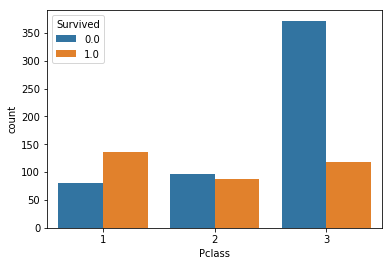

In [145]:
sns.countplot(data['Pclass'], hue=data['Survived'])


C:\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


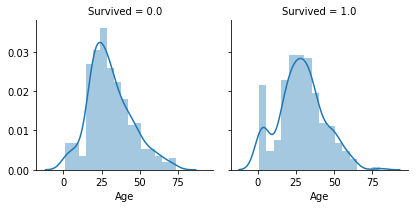

In [146]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=True)

C:\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warni

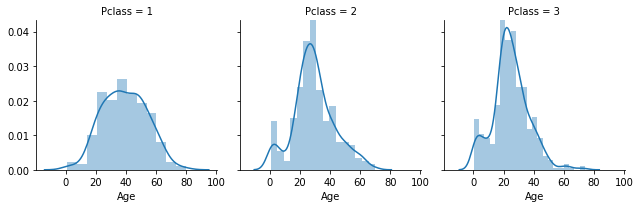

In [147]:
x = sns.FacetGrid(data, col='Pclass')
x.map(sns.distplot, 'Age', kde=True)

C:\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


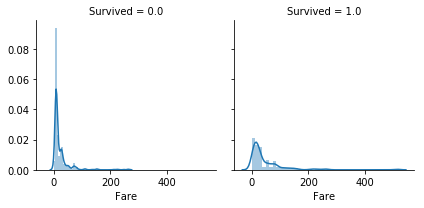

In [148]:
x = sns.FacetGrid(data, col='Survived')
x.map(sns.distplot, 'Fare', kde=True)

C:\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


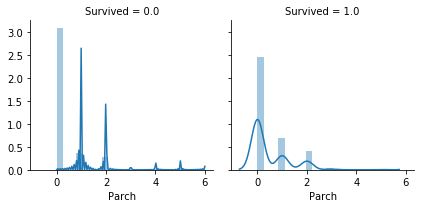

In [149]:
x = sns.FacetGrid(data, col='Survived')
x.map(sns.distplot, 'Parch', kde=True)

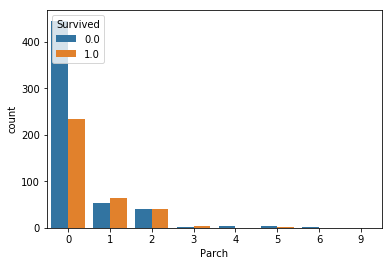

In [150]:
sns.countplot(data['Parch'], hue=data['Survived'])


In [151]:
data['Family_Size']= data['Parch']+data['SibSp']


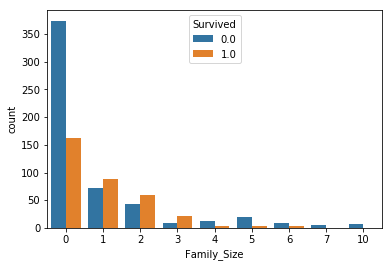

In [152]:
sns.countplot(data['Family_Size'], hue=data['Survived'])


In [153]:
data.head()['Name']

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [154]:
 data['Title1']=data['Name'].str.split(',',expand=True)[1]
data['Title1']

0                                         Mr. Owen Harris
1              Mrs. John Bradley (Florence Briggs Thayer)
2                                             Miss. Laina
3                      Mrs. Jacques Heath (Lily May Peel)
4                                       Mr. William Henry
5                                               Mr. James
6                                           Mr. Timothy J
7                                   Master. Gosta Leonard
8                Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                             Mrs. Nicholas (Adele Achem)
10                                   Miss. Marguerite Rut
11                                        Miss. Elizabeth
12                                      Mr. William Henry
13                                       Mr. Anders Johan
14                            Miss. Hulda Amanda Adolfina
15                                Mrs. (Mary D Kingcome) 
16                                         Master. Eugene
17            

In [155]:
data['Title1'] = data['Title1'].str.split(".", expand=True)[0]
data['Title1']

0            Mr
1           Mrs
2          Miss
3           Mrs
4            Mr
5            Mr
6            Mr
7        Master
8           Mrs
9           Mrs
10         Miss
11         Miss
12           Mr
13           Mr
14         Miss
15          Mrs
16       Master
17           Mr
18          Mrs
19          Mrs
20           Mr
21           Mr
22         Miss
23           Mr
24         Miss
25          Mrs
26           Mr
27           Mr
28         Miss
29           Mr
         ...   
1279         Mr
1280     Master
1281         Mr
1282        Mrs
1283     Master
1284         Mr
1285         Mr
1286        Mrs
1287         Mr
1288        Mrs
1289         Mr
1290         Mr
1291       Miss
1292         Mr
1293       Miss
1294         Mr
1295         Mr
1296         Mr
1297         Mr
1298         Mr
1299       Miss
1300       Miss
1301       Miss
1302        Mrs
1303       Miss
1304         Mr
1305       Dona
1306         Mr
1307         Mr
1308     Master
Name: Title1, Length: 13

In [156]:
data['Title1'].unique()


array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [157]:
data.groupby('Title1')['Age'].mean()


Title1
 Capt            70.000000
 Col             54.000000
 Don             40.000000
 Dona            39.000000
 Dr              43.571429
 Jonkheer        38.000000
 Lady            48.000000
 Major           48.500000
 Master           5.482642
 Miss            21.774238
 Mlle            24.000000
 Mme             24.000000
 Mr              32.252151
 Mrs             36.994118
 Ms              28.000000
 Rev             41.250000
 Sir             49.000000
 the Countess    33.000000
Name: Age, dtype: float64

In [158]:
pd.crosstab(data['Title1'],data['Sex']).T.style.background_gradient(cmap='summer_r')
## crosstab == Confusion Matrix

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [159]:
pd.crosstab(data['Title1'],data['Survived']).T.style.background_gradient(cmap='summer_r')


Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [160]:
data.groupby(['Title1'])['Age'].mean()


Title1
 Capt            70.000000
 Col             54.000000
 Don             40.000000
 Dona            39.000000
 Dr              43.571429
 Jonkheer        38.000000
 Lady            48.000000
 Major           48.500000
 Master           5.482642
 Miss            21.774238
 Mlle            24.000000
 Mme             24.000000
 Mr              32.252151
 Mrs             36.994118
 Ms              28.000000
 Rev             41.250000
 Sir             49.000000
 the Countess    33.000000
Name: Age, dtype: float64

In [161]:
data.groupby(['Title1','Pclass'])['Age'].mean()


Title1         Pclass
 Capt          1         70.000000
 Col           1         54.000000
 Don           1         40.000000
 Dona          1         39.000000
 Dr            1         45.600000
               2         38.500000
 Jonkheer      1         38.000000
 Lady          1         48.000000
 Major         1         48.500000
 Master        1          6.984000
               2          2.757273
               3          6.090000
 Miss          1         30.338983
               2         20.717083
               3         17.360874
 Mlle          1         24.000000
 Mme           1         24.000000
 Mr            1         41.450758
               2         32.346715
               3         28.318910
 Mrs           1         43.208955
               2         33.518519
               3         32.326531
 Ms            2         28.000000
               3               NaN
 Rev           2         41.250000
 Sir           1         49.000000
 the Countess  1         33.00000

In [162]:
data['Name'][759]

'Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)'

In [163]:
data["Title1"].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [168]:
data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [170]:
print(data["Title2"].unique())

[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer' ' Dona']


 磁碟區 C 中的磁碟沒有標籤。
 磁碟區序號:  2472-5075

 C:\Users\tcfst 的目錄

2019/10/06  下午 02:02    <DIR>          .
2019/10/06  下午 02:02    <DIR>          ..
2019/07/22  下午 01:40    <DIR>          .android
2016/07/05  下午 07:35    <DIR>          .AndroidStudio2.1
2017/09/07  上午 09:15    <DIR>          .argouml
2017/09/07  上午 10:15    <DIR>          .astah
2017/09/13  上午 10:22    <DIR>          .astropy
2017/10/26  上午 09:02               442 .dbshell
2018/11/26  下午 07:41    <DIR>          .dotnet
2017/10/03  下午 02:34    <DIR>          .eclipse
2017/10/05  上午 08:54    <DIR>          .ipfs
2019/10/06  下午 02:01    <DIR>          .ipynb_checkpoints
2016/05/23  上午 09:08    <DIR>          .jssc
2019/07/23  上午 08:59    <DIR>          .LdVirtualBox
2017/10/16  下午 02:21             1,010 .mongorc.js
2019/02/16  下午 01:53    <DIR>          .oracle_jre_usage
2017/10/03  下午 02:09    <DIR>          .p2
2018/05/20  上午 09:39                65 .pgAdmin4.2123502176.addr
2018/05/20  下午 02:45             2,202 .pgAdmin4.212